# Real Estate Pricing
### This python notebook performs a simple linear regression on various features to predict housing prices.

In [1]:
# data handling
import pandas as pd
import numpy as np

# regression functions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load housing data
df = pd.read_csv("Housing.csv")

# check for null entries and datatypes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# check for mislabeled entries
print(f'Mainroad Unique Values: {sorted(df['mainroad'].unique())}')
print(f'Guestroom Unique Values: {sorted(df['guestroom'].unique())}')
print(f'Basement Unique Values: {sorted(df['basement'].unique())}')
print(f'Hotwater Heating Unique Values: {sorted(df['hotwaterheating'].unique())}')
print(f'Airconditioning Unique Values: {sorted(df['airconditioning'].unique())}')
print(f'Preferred Area Unique Values: {sorted(df['prefarea'].unique())}')
print(f'Furnishing Status Unique Values: {sorted(df['furnishingstatus'].unique(), reverse=True)}')
print(f'Bedrooms: {np.sort(df['bedrooms'].unique())}')
print(f'Bathrooms: {np.sort(df['bathrooms'].unique())}')
print(f'Stories: {np.sort(df['stories'].unique())}')
print(f'Parking: {np.sort(df['parking'].unique())}')

# check to see if there are duplicates
if len(df.drop_duplicates())==len(df):
    print('\nNO DUPLCIATES')

Mainroad Unique Values: ['no', 'yes']
Guestroom Unique Values: ['no', 'yes']
Basement Unique Values: ['no', 'yes']
Hotwater Heating Unique Values: ['no', 'yes']
Airconditioning Unique Values: ['no', 'yes']
Preferred Area Unique Values: ['no', 'yes']
Furnishing Status Unique Values: ['unfurnished', 'semi-furnished', 'furnished']
Bedrooms: [1 2 3 4 5 6]
Bathrooms: [1 2 3 4]
Stories: [1 2 3 4]
Parking: [0 1 2 3]

NO DUPLCIATES


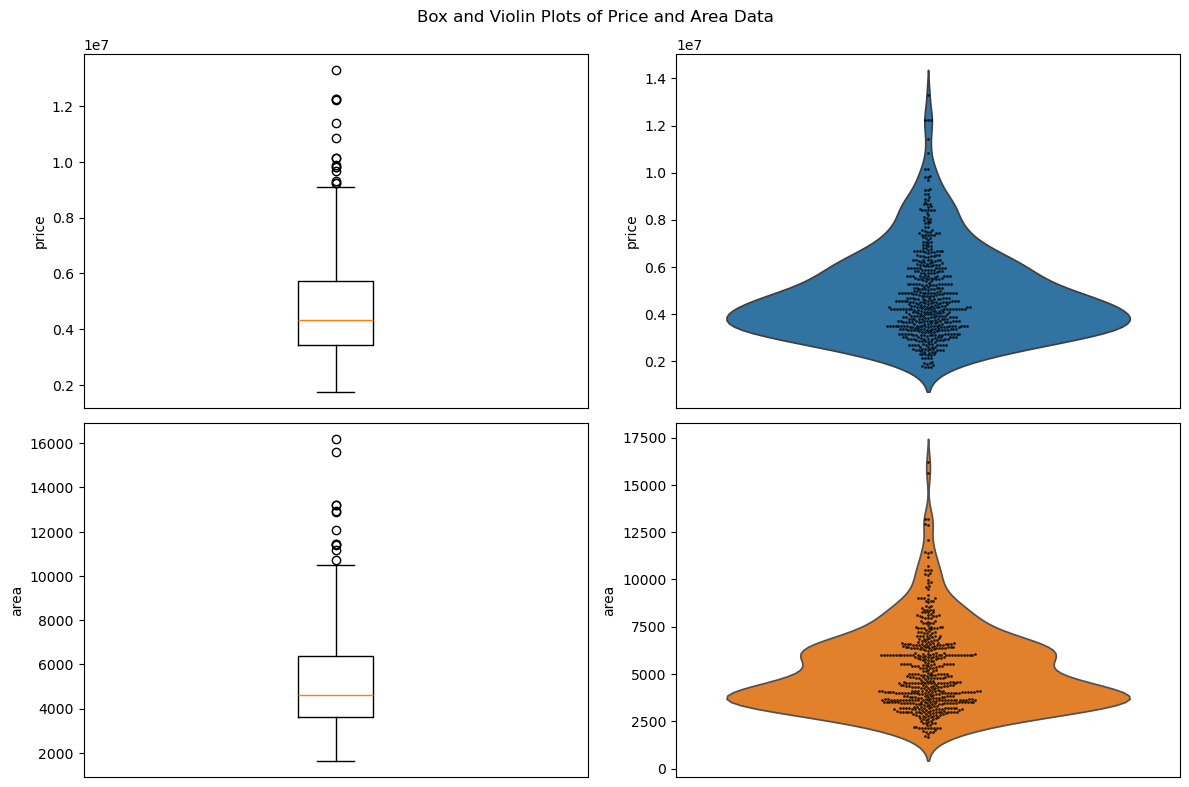

In [4]:
# check values for continuous features
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0,0].boxplot(df['price'].values)
axs[0,0].set_ylabel('price')
axs[0,0].set_xticks([])

axs[1,0].boxplot(df['area'].values)
axs[1,0].set_ylabel('area')
axs[1,0].set_xticks([])

sns.violinplot(x = 1, y=df['price'], inner=None, ax=axs[0,1], color='C0')
sns.swarmplot(x= 1, y=df['price'], color='k', alpha=0.8, size=2, ax=axs[0,1])
axs[0,1].set_xticks([])

sns.violinplot(x = 1, y=df['area'], inner=None, ax=axs[1,1], color='C1')
sns.swarmplot(x= 1, y=df['area'], color='k', alpha=0.8, size=2, ax=axs[1,1])
axs[1,1].set_xticks([])

plt.suptitle('Box and Violin Plots of Price and Area Data')
plt.tight_layout()
plt.show()

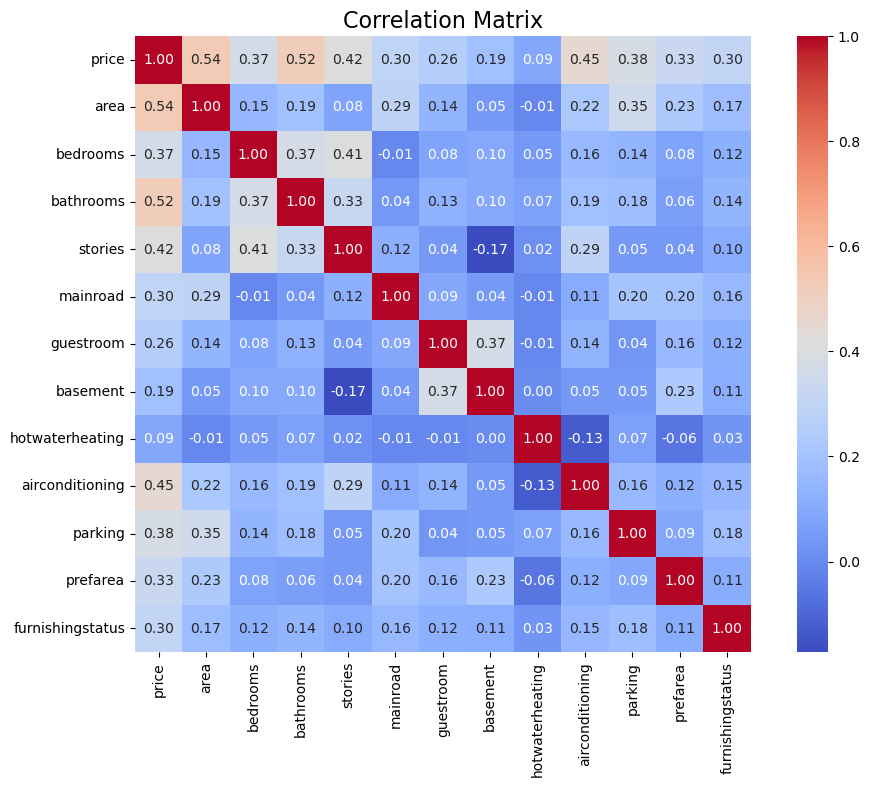

In [5]:
# convert categorical features to binary (int)
for feature in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[feature] = df[feature].map({'no':0, 'yes':1})

# choose integer labeling since there is a natural ordering to funishingstatus (unfurnished < semi-furnished < furnished)
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})

# visualize linear correlations
corr = df.corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(f'Correlation Matrix', fontsize=16)
plt.show()

In [6]:
# features are not highly correlated... we can perform linear regression with all features

# helper function to load in the data, clean, and split
def load_clean_and_split():
    
    # load data
    df = pd.read_csv("Housing.csv")
    
    # convert binary features to int (0,1)
    for feature in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
        df[feature] = df[feature].map({'no':0, 'yes':1})
    
    # convert furnishingstatus to integer
    df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})
    
    # shuffle the dataset
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # split into train (80%) and test (20%) subsets
    df_train = df[:int(len(df)*0.8)].astype(float).copy()
    df_test = df[int(len(df)*0.8):].astype(float).copy()

    return df, df_train, df_test

MAE: 759655.3042130691
MSE: 1095358052352.1627
R²: 0.6856669311134542


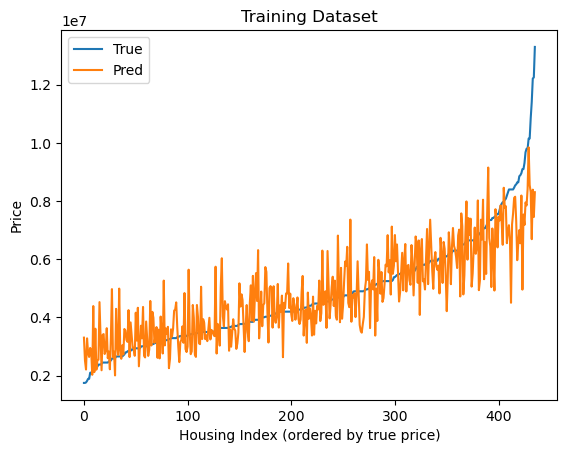

In [7]:
df, df_train, df_test = load_clean_and_split()

# select features and labels
features = df_train.columns.to_numpy()[1:]

# get feature inputs and labels
X_train = df_train[features].to_numpy()
y_train = df_train['price'].to_numpy()

# fit regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# check performance
y_pred = (linear_model.predict(X_train)).reshape(-1)
print("MAE:", mean_absolute_error(y_train, y_pred))
print("MSE:", mean_squared_error(y_train, y_pred))
print("R²:", r2_score(y_train, y_pred))

# visualize performance
sorted_indices =  np.argsort(y_train)
plt.plot(y_train[sorted_indices], label='True')
plt.plot(y_pred[sorted_indices], label='Pred')
plt.legend()
plt.xlabel('Housing Index (ordered by true price)')
plt.ylabel('Price')
plt.title('Training Dataset')
plt.show()

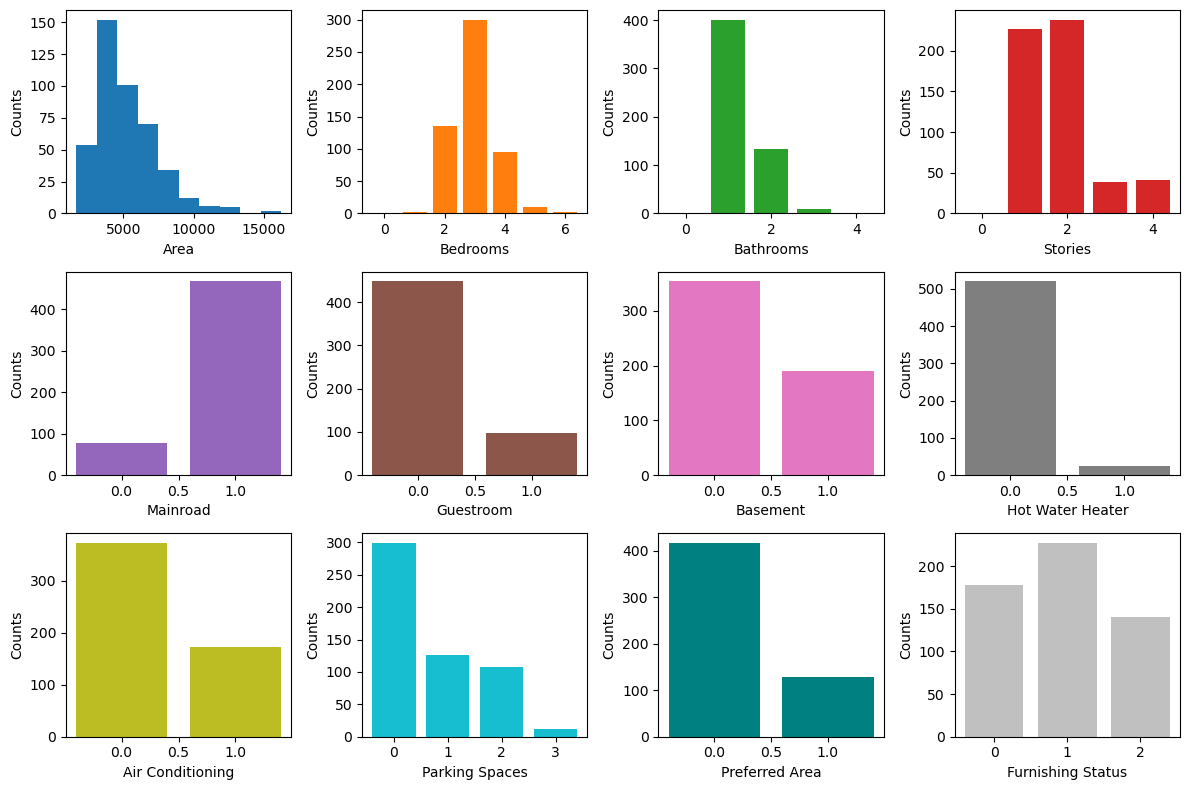

In [8]:
# linear model struggles to predict large prices
# lets try to improve this

# visualize distributions of features
fig, axs = plt.subplots(3,4,figsize=(12,8))
axs[0,0].hist(df_train['area'], color='C0')
axs[0,1].bar(np.array([0,1,2,3,4,5,6]), np.bincount(df['bedrooms'].astype(int)), color='C1')
axs[0,2].bar(np.array([0,1,2,3,4]), np.bincount(df['bathrooms'].astype(int)), color='C2')
axs[0,3].bar(np.array([0,1,2,3,4]), np.bincount(df['stories'].astype(int)), color='C3')

axs[1,0].bar(np.array([0,1]), np.bincount(df['mainroad'].astype(int)), color='C4')
axs[1,1].bar(np.array([0,1]), np.bincount(df['guestroom'].astype(int)), color='C5')
axs[1,2].bar(np.array([0,1]), np.bincount(df['basement'].astype(int)), color='C6')
axs[1,3].bar(np.array([0,1]), np.bincount(df['hotwaterheating'].astype(int)), color='C7')

axs[2,0].bar(np.array([0,1]), np.bincount(df['airconditioning'].astype(int)), color='C8')
axs[2,1].bar(np.array([0,1,2,3]), np.bincount(df['parking'].astype(int)), color='C9')
axs[2,2].bar(np.array([0,1]), np.bincount(df['prefarea'].astype(int)), color='teal')
axs[2,3].bar(np.array([0,1,2]), np.bincount(df['furnishingstatus'].astype(int)), color='silver')


axs[0,0].set_ylabel('Counts')
axs[0,1].set_ylabel('Counts')
axs[0,2].set_ylabel('Counts')
axs[0,3].set_ylabel('Counts')
axs[1,0].set_ylabel('Counts')
axs[1,1].set_ylabel('Counts')
axs[1,2].set_ylabel('Counts')
axs[1,3].set_ylabel('Counts')
axs[2,0].set_ylabel('Counts')
axs[2,1].set_ylabel('Counts')
axs[2,2].set_ylabel('Counts')
axs[2,3].set_ylabel('Counts')

axs[0,0].set_xlabel('Area')
axs[0,1].set_xlabel('Bedrooms')
axs[0,2].set_xlabel('Bathrooms')
axs[0,3].set_xlabel('Stories')
axs[1,0].set_xlabel('Mainroad')
axs[1,1].set_xlabel('Guestroom')
axs[1,2].set_xlabel('Basement')
axs[1,3].set_xlabel('Hot Water Heater')
axs[2,0].set_xlabel('Air Conditioning')
axs[2,1].set_xlabel('Parking Spaces')
axs[2,2].set_xlabel('Preferred Area')
axs[2,3].set_xlabel('Furnishing Status')


plt.tight_layout()
plt.show()


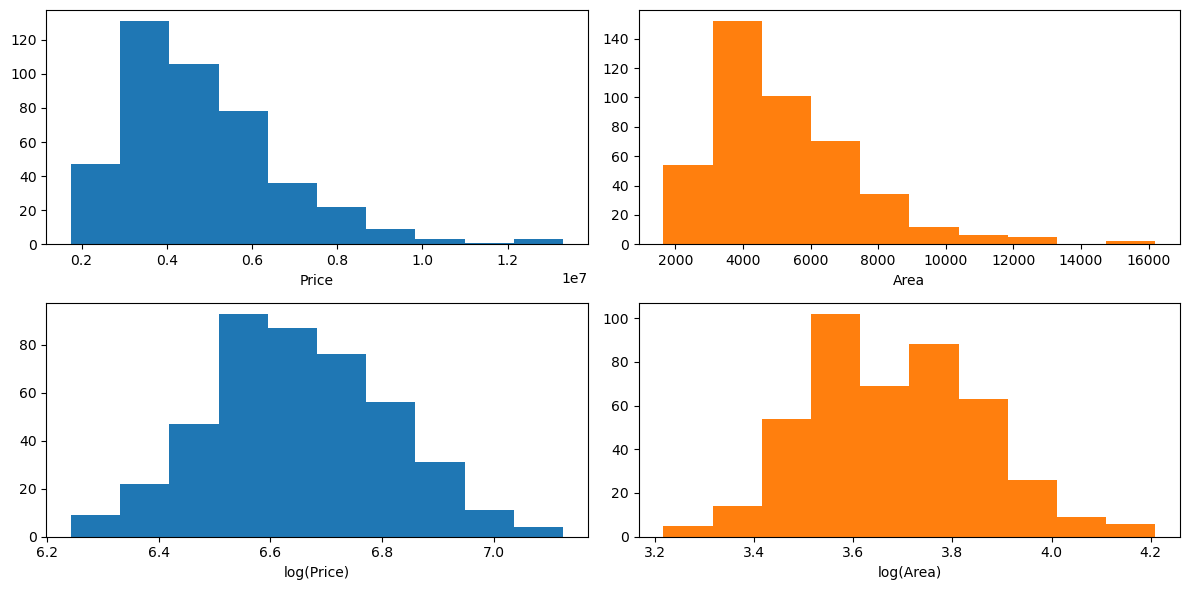

In [13]:
# area and price data are not normally distributed (very right-skewed)
fig, axs = plt.subplots(2,2, figsize=(12,6))
axs[0,0].hist(df_train['price'], color='C0')
axs[0,1].hist(df_train['area'], color='C1')
axs[1,0].hist(np.log10(df_train['price']), color='C0')
axs[1,1].hist(np.log10(df_train['area']), color='C1')

axs[0,0].set_xlabel('Price')
axs[0,1].set_xlabel('Area')
axs[1,0].set_xlabel('log(Price)')
axs[1,1].set_xlabel('log(Area)')

plt.tight_layout()
plt.show()

MAE: 736454.6877744966
MSE: 1053772908513.5936
R²: 0.6976005503120314


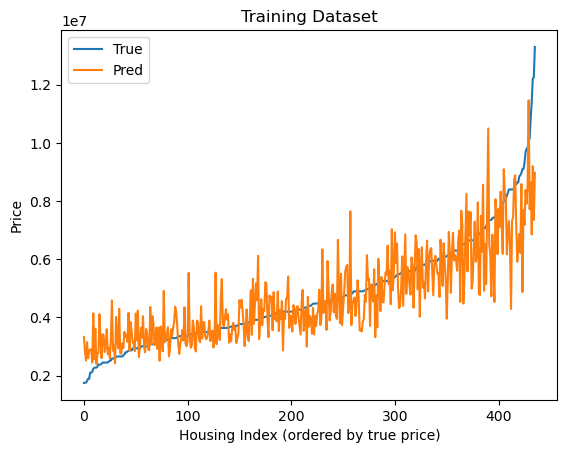

In [10]:
# re-apply linear regression
df, df_train, df_test = load_clean_and_split()

# perform log transformation on area and prices
df_train['log(area)'] = np.log10(df_train['area'])
df_train['log(price)'] = np.log10(df_train['price'])
df_test['log(area)'] = np.log10(df_test['area'])
df_test['log(price)'] = np.log10(df_test['price'])

# select features
features = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'log(area)']

# get inputs and labels
X_train = df_train[features].to_numpy()
y_train = df_train['log(price)'].to_numpy()

# fit regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# test performance
y_pred = (linear_model.predict(X_train)).reshape(-1)

#convert log(price) predictions back to price
y_pred = 10**y_pred
y_train = 10**y_train

# evaluate and visualize performance
print("MAE:", mean_absolute_error(y_train, y_pred))
print("MSE:", mean_squared_error(y_train, y_pred))
print("R²:", r2_score(y_train, y_pred))
sorted_indices =  np.argsort(y_train)
plt.plot(y_train[sorted_indices], label='True')
plt.plot(y_pred[sorted_indices], label='Pred')
plt.legend()
plt.xlabel('Housing Index (ordered by true price)')
plt.ylabel('Price')
plt.title('Training Dataset')
plt.show()

MAE: 797537.7212548641
MSE: 1146844012420.2676
R²: 0.6734502684231279


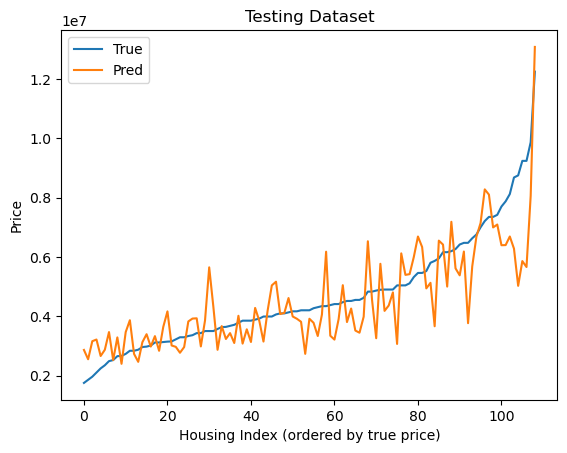

In [12]:
# R^2 improved and we are modeling high priced houses more accurately
# lastly, we test our model on the testing set, which it has not seen yet
# model performs reasonably well across the entire price range
X_test = df_test[features].to_numpy()
y_test = df_test['log(price)'].to_numpy()
y_pred = (linear_model.predict(X_test)).reshape(-1)
y_pred = 10**y_pred
y_test = 10**y_test
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
sorted_indices =  np.argsort(y_test)
plt.plot(y_test[sorted_indices], label='True')
plt.plot(y_pred[sorted_indices], label='Pred')
plt.legend()
plt.xlabel('Housing Index (ordered by true price)')
plt.ylabel('Price')
plt.title('Testing Dataset')
plt.show()